# Robotics via Simple Pendulum

This notebook helps in understanding the fundamentals of robotics using a simple pendulum. The pendulum is constructed as follows: a mass is attached using a very lighweight rod to a motor which can apply force/torque when we supply current to the motor. The simple task to be simulated using this notebooks is as follows: To move a pendulum from a bottom position to the top position i.e. perform a **swing-up** of the pendulum. The problem seems straightforward but the motor does not always have enough power i.e. current to directly do a swing-up. Hence, we have to get creative in how we can do the swing-up.

**German Version:**
Dieses Heft hilft beim Verständnis der Grundlagen der Robotik anhand eines einfachen Pendels. Das Pendel ist wie folgt aufgebaut: Eine Masse ist mit einer sehr leichten Stange an einem Motor befestigt, der eine Kraft/Drehmoment aufbringen kann, wenn wir Strom an den Motor anlegen. Die einfache Aufgabe, die mit Hilfe dieses Notebooks simuliert werden soll, lautet wie folgt: Ein Pendel von einer unteren Position in die obere Position zu bewegen, d.h. ein **swing-up** des Pendels durchzuführen. Das Problem scheint einfach zu sein, aber der Motor hat nicht immer genug Leistung, d.h. Strom, um direkt ein Hochschwingen durchzuführen. Daher müssen wir kreativ werden, wie wir das Hochschwingen durchführen können.

One creative way of doing a swing-up is relatable to everyone. We do this while using a swing at a park to go higher. We do not have enough force to directly go very high with the swing, so we keep adding evergy at each swing of the swing. In this way, after every swing, more energy is added and we go higher and higher. A similar idea can be applied to swing-up the pendulum when the motor does not have enough current/power.

In this way, instead of using electrical current to overpower the swing, we use the natural movement of the pendulum and only add energy at the right time, similar to swinging in a park.

**German Version:**
Eine kreative Art, sich hochzuschwingen, ist für jeden nachvollziehbar. Wir tun dies, während wir eine Schaukel im Park benutzen, um höher zu kommen. Wir haben nicht genug Kraft, um mit der Schaukel direkt sehr hoch zu gehen, also fügen wir bei jedem Schwung der Schaukel immer wieder Energie hinzu. Auf diese Weise wird nach jedem Schwung mehr Energie hinzugefügt und wir gehen höher und höher. Eine ähnliche Idee kann zum Aufschwingen des Pendels angewendet werden, wenn der Motor nicht genug Strom/Leistung hat.

Auf diese Weise nutzen wir, anstatt mit elektrischem Strom die Schaukel zu überlasten, die natürliche Bewegung des Pendels und fügen nur zum richtigen Zeitpunkt Energie hinzu, ähnlich wie beim Schaukeln in einem Park.

## Instructions

To play with this notebook, edit the numbers that are marked with **Edit Here!!!** and run the simulation again by pressing the play button on the left side of the cell.

**German Version:**
Um mit diesem Notizbuch zu spielen, bearbeiten Sie die Zahlen, die mit **Hier bearbeiten!!!** markiert sind, und führen Sie die Simulation erneut aus, indem Sie auf die Wiedergabetaste auf der linken Seite der Zelle drücken.

# Simulation Setup

The following cells setup the tools required for the pendulum swing-up simulation. It installs the tools required to find the trajectory/method for swing-up of the pendulum and then animate the result.

**Do not edit anything in these cells.**

**German Version:**
Die folgenden Zellen richten die Werkzeuge ein, die für die Pendelaufschwingungssimulation benötigt werden. Es werden die Werkzeuge installiert, die erforderlich sind, um die Trajektorie/Methode für das Aufschwingen des Pendels zu finden und dann das Ergebnis zu animieren.

**Bearbeiten Sie nichts in diesen Zellen.

## Setup PyDrake using underactuated in Google Colab

In [2]:
import sys, os
import importlib
from urllib.request import urlretrieve

IS_COLAB = 'google.colab' in sys.modules

if IS_COLAB and importlib.util.find_spec('pydrake') is None:
    urlretrieve(f"http://underactuated.csail.mit.edu/scripts/setup/setup_underactuated_colab.py",
                "setup_underactuated_colab.py")
    from setup_underactuated_colab import setup_underactuated
    setup_underactuated(underactuated_sha='15cfd96b0bdfd1b0c67597c24f91907776c02a6d', drake_version='0.27.0', drake_build='release')

# Setup utils.py file path
if IS_COLAB:
  # Check if this cell has already been run:
  if not os.path.isdir('DrakeTests/simplePendulum/'):
    !git clone https://github.com/vyas-shubham/DrakeTests.git
    from DrakeTests.simplePendulum.pendulumUtils import *
else:
    from pendulumUtils import *

## Import Libraries

In [4]:
# Imports
import math
import numpy as np

import matplotlib.pyplot as plt
# from underactuated.jupyter import SetupMatplotlibBackend
# plt_is_interactive = SetupMatplotlibBackend()

from underactuated.pendulum import PendulumVisualizer

# Run the Simulation/ Ausführen der Simulation

In [12]:
# Inputs
# Eingabeparameter

# Hier bearbeiten!!!
# Edit Here!!!
mass = 1

# Hier bearbeiten!!!
# Edit Here!!!
damping = 0.15

# Hier bearbeiten!!!
# Edit Here!!!
max_torque = 3


# Run the simulation, check if it was succesfull, and get the result
# Führen Sie die Simulation aus, prüfen Sie, ob sie erfolgreich war, und erhalten Sie das Ergebnis
result, x_trajectory, torque_trajectory = runPendulumSimulation(mass, damping, max_torque)
assert result.is_success(), "The simulation was not succesfull. Please try changing the input parameters. \
                        Die Simulation war nicht erfolgreich. Bitte versuchen Sie, die Eingabeparameter zu ändern."

[1.0, 0.5, 0.1, 9.81]
[0.57288, 1.0, 0.15, 9.81]
3


In [7]:
# Animate the result and create animation video.

from IPython.display import HTML
vis = PendulumVisualizer(show=False)
ani = vis.animate(x_trajectory)
HTML(ani.to_jshtml())

## Extract Trajectory

In [8]:
time_trajectory, angle, angle_velocity = extractTrajectory(x_trajectory, torque_trajectory)

Time Array Shape: (1, 1878)
Theta&ThetaDot Array Shape: (2, 1878)
Theta Array Shape: (1, 1878)
Control Torque Array Shape: (1, 1878)


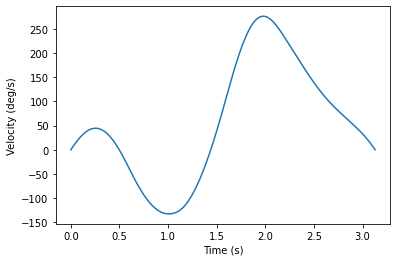

In [9]:
# Plot
plt.plot(time_trajectory[0, :], np.rad2deg(angle_velocity[0,:]))
xlabel = plt.xlabel("Time (s)")
ylabel = plt.ylabel("Velocity (deg/s)")

In [10]:
# Plot
plt.plot(time_trajectory[0, :], torque_trajectory[0, :])
xlabel = plt.xlabel("Time (s)")
ylabel = plt.ylabel("Position (deg)")

TypeError: 'pydrake.trajectories.PiecewisePolynomial' object is not subscriptable